<a href="https://colab.research.google.com/github/tanishachoudhary/Real-time-trading-bot/blob/main/trading_BOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr
import yfinance as yf
yf.pdr_override()
df=pdr.data.get_data_yahoo(["TSLA"])
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-04-03,164.020004,168.820007,163.279999,168.380005,168.380005,82950100
2024-04-04,170.070007,177.190002,168.009995,171.110001,171.110001,123162000
2024-04-05,169.080002,170.860001,160.509995,164.899994,164.899994,141250700


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3468 entries, 2010-06-29 to 2024-04-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3468 non-null   float64
 1   High       3468 non-null   float64
 2   Low        3468 non-null   float64
 3   Close      3468 non-null   float64
 4   Adj Close  3468 non-null   float64
 5   Volume     3468 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 189.7 KB


In [ ]:
from datetime import datetime

In [ ]:
type(df)

pandas.core.frame.DataFrame

<Axes: xlabel='Date'>

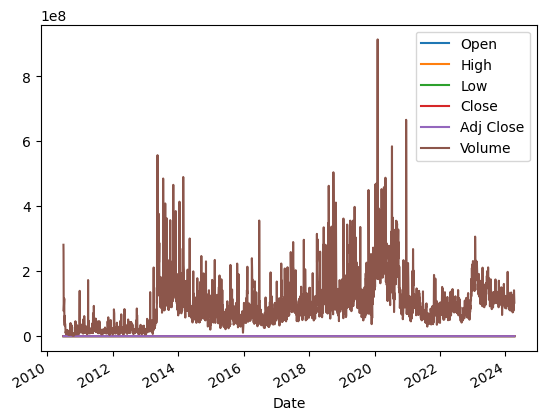

In [ ]:
df.plot()

<Axes: xlabel='Date'>

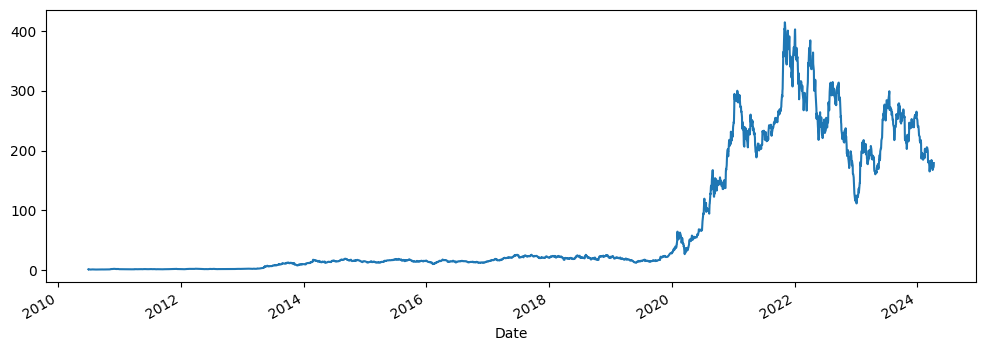

In [ ]:
df['High'].plot(figsize=(12,4))

<Axes: xlabel='Date'>

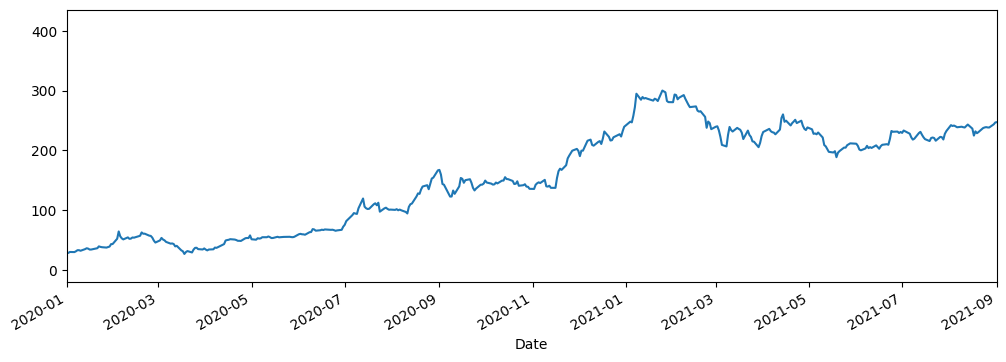

In [ ]:
df['High'].plot(xlim=['2020-01-01','2021-09-01'],figsize=(12,4))

In [ ]:
df.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2024-03-26', '2024-03-27', '2024-03-28', '2024-04-01',
               '2024-04-02', '2024-04-03', '2024-04-04', '2024-04-05',
               '2024-04-08', '2024-04-09'],
              dtype='datetime64[ns]', name='Date', length=3468, freq=None)

In [ ]:
share_close=df.loc['2020-01-01':'2021-09-01']['Close']
share_close

Date
2020-01-02     28.684000
2020-01-03     29.534000
2020-01-06     30.102667
2020-01-07     31.270666
2020-01-08     32.809334
                 ...    
2021-08-26    233.720001
2021-08-27    237.306671
2021-08-30    243.636673
2021-08-31    245.240005
2021-09-01    244.696671
Name: Close, Length: 421, dtype: float64

<Axes: xlabel='Date'>

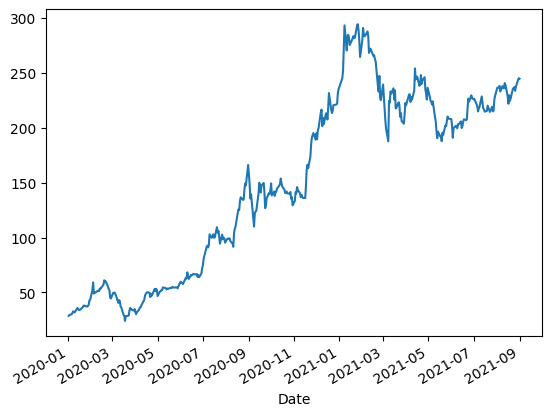

In [ ]:
share_close.plot()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
share_close=scaler.fit_transform(np.array(share_close).reshape(-1,1))

In [ ]:
share_close

array([[0.01702913],
       [0.02017399],
       [0.02227797],
       [0.02659938],
       [0.0322922 ],
       [0.02962831],
       [0.02884148],
       [0.04036278],
       [0.0435841 ],
       [0.03879405],
       [0.0375583 ],
       [0.0368208 ],
       [0.04587307],
       [0.05138831],
       [0.05203948],
       [0.05021915],
       [0.04854189],
       [0.05073219],
       [0.05420758],
       [0.06896255],
       [0.0713699 ],
       [0.10329458],
       [0.12970157],
       [0.09212106],
       [0.09563838],
       [0.09541886],
       [0.10114374],
       [0.10190837],
       [0.10015959],
       [0.10921432],
       [0.1082351 ],
       [0.1226324 ],
       [0.13719003],
       [0.13274777],
       [0.13313995],
       [0.1165622 ],
       [0.10820549],
       [0.10299859],
       [0.07838233],
       [0.07566664],
       [0.09432125],
       [0.09478742],
       [0.09577158],
       [0.08961504],
       [0.08442047],
       [0.06086975],
       [0.07007742],
       [0.067

In [ ]:

training_size=int(len(share_close)*0.65)
test_size=len(share_close)-training_size
train_data,test_data=share_close[0:training_size,:],share_close[training_size:len(share_close),:1]

In [ ]:
def create_dataset(dataset,time_step=1):
  dataX,dataY= [],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [ ]:
print("In above line of code we have done , for Ex I have rates for few days like : 120,130,125,140,134,150  this is for training data\n now for testing we have 160,190,154,\nso our o/p should in form like we have 3 timestamp 120,130,125, so our o/p should be 140 next time i/p will be 130,125,140 so for this type of format the above code is written")

In above line of code we have done , for Ex I have rates for few days like : 120,130,125,140,134,150  this is for training data
 now for testing we have 160,190,154,
so our o/p should in form like we have 3 timestamp 120,130,125, so our o/p should be 140 next time i/p will be 130,125,140 so for this type of format the above code is written


In [ ]:
print("we will do for 100 time stamps, means 99 i/p will be there as independent feature and 100th value will be o/p ")

we will do for 100 time stamps, means 99 i/p will be there as independent feature and 100th value will be o/p 


In [ ]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [ ]:
X_train

array([[0.01702913, 0.02017399, 0.02227797, ..., 0.1150354 , 0.11239126,
        0.11288209],
       [0.02017399, 0.02227797, 0.02659938, ..., 0.11239126, 0.11288209,
        0.11321755],
       [0.02227797, 0.02659938, 0.0322922 , ..., 0.11288209, 0.11321755,
        0.10966078],
       ...,
       [0.46263532, 0.41284782, 0.42680854, ..., 0.95504686, 0.99717578,
        1.        ],
       [0.41284782, 0.42680854, 0.31814425, ..., 0.99717578, 1.        ,
        0.97665402],
       [0.42680854, 0.31814425, 0.36262864, ..., 1.        , 0.97665402,
        0.94122181]])

In [ ]:
print(X_train.shape),print(y_train.shape)

(172, 100)
(172,)


(None, None)

In [ ]:
print(X_test.shape,y_test.shape)

(47, 100) (47,)


In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

#Stacked lstm mode

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional


In [ ]:
model=Sequential()
model.add((LSTM(50,return_sequences=True,input_shape=(100,1))))
model.add((LSTM(50,return_sequences=True)))
model.add((LSTM(50)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
3/3 [==============================] - 7s 515ms/step - loss: 0.2323 - val_loss: 0.2831
Epoch 2/100
3/3 [==============================] - 0s 37ms/step - loss: 0.0956 - val_loss: 0.0051
Epoch 3/100
3/3 [==============================] - 0s 36ms/step - loss: 0.0270 - val_loss: 0.0649
Epoch 4/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0273 - val_loss: 0.0032
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0143 - val_loss: 0.0332
Epoch 6/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0221 - val_loss: 0.0243
Epoch 7/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0148 - val_loss: 0.0024
Epoch 8/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0085 - val_loss: 0.0095
Epoch 9/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0114 - val_loss: 0.0107
Epoch 10/100
3/3 [==============================] - 0s 32ms/step - loss: 0.0079 - val_loss: 0.0011
Epoch 11/100
3/3 [

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2/2 [==============================] - 0s 9ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

160.2124892253994

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

242.58030893746786

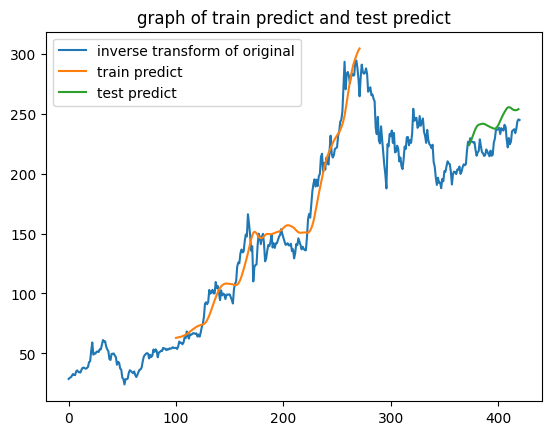

In [ ]:
look_back=100
trainPredictPlot = np.empty_like(share_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(share_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(share_close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(share_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('graph of train predict and test predict')
plt.legend(["inverse transform of original","train predict","test predict"])
plt.show()


In [ ]:
print(" In graph for time stamp 100 means for train predict : (orange color line):\n i/p : (0 to 99 days)\t o/p: (100th day)\t close price: near by 50\n i/p : (1 to 100 days)\t o/p: (101th day)\t close price: near by 50 ")

 In graph for time stamp 100 means for train predict : (orange color line):
 i/p : (0 to 99 days)	 o/p: (100th day)	 close price: near by 50
 i/p : (1 to 100 days)	 o/p: (101th day)	 close price: near by 50 


In [ ]:
len(test_data)

148

In [ ]:
print("as my test_data length is 148 that means we have share price of 148 days but if i want for 149th day i have to consider previous 100 days' share rate")

as my test_data length is 148 that means we have share price of 148 days but if i want for 149th day i have to consider previous 100 days' share rate


In [ ]:
x_input=test_data[48:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [ ]:
temp_input

[0.8510567972275255,
 0.8139473570891835,
 0.8221117195822601,
 0.8232586607330885,
 0.7922416821114794,
 0.7976187450131651,
 0.8286110527702876,
 0.7984820559049975,
 0.810457191907725,
 0.8213100576241108,
 0.7800445083283716,
 0.7672923812319814,
 0.7458333584440769,
 0.7858409194712639,
 0.7555762610788307,
 0.7416402147624158,
 0.7383596672464932,
 0.7292333668587047,
 0.7401232670993543,
 0.6866852148849939,
 0.6720832245926404,
 0.6384023571571413,
 0.6159566691549708,
 0.6382173539010247,
 0.6222957264064358,
 0.6235783290844074,
 0.6058067819387876,
 0.6345668563279363,
 0.6272904755911788,
 0.6588131222521643,
 0.6566549014776507,
 0.6744634266924668,
 0.688917504708035,
 0.6819740959592469,
 0.6803461576335289,
 0.6571851839264463,
 0.6173749333600855,
 0.649699185524153,
 0.6571975475862234,
 0.655298286206219,
 0.6493662135361835,
 0.6633516015815718,
 0.6630679148675084,
 0.672687519634896,
 0.6500814992410957,
 0.6568768828029636,
 0.6713432680232415,
 0.679618564723907

In [ ]:
print(" close price for next 30 days\n")
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("\n{} day input \t{}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("\n{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

 close price for next 30 days

[0.85777014]
101

1 day input 	[0.81394736 0.82211172 0.82325866 0.79224168 0.79761875 0.82861105
 0.79848206 0.81045719 0.82131006 0.78004451 0.76729238 0.74583336
 0.78584092 0.75557626 0.74164021 0.73835967 0.72923337 0.74012327
 0.68668521 0.67208322 0.63840236 0.61595667 0.63821735 0.62229573
 0.62357833 0.60580678 0.63456686 0.62729048 0.65881312 0.6566549
 0.67446343 0.6889175  0.6819741  0.68034616 0.65718518 0.61737493
 0.64969919 0.65719755 0.65529829 0.64936621 0.6633516  0.66306791
 0.67268752 0.6500815  0.65687688 0.67134327 0.67961856 0.67656
 0.68011187 0.72063746 0.74931122 0.73950661 0.76028738 0.75047046
 0.74916319 0.74696794 0.74817658 0.72434961 0.70593673 0.7160003
 0.7211061  0.75656287 0.73539978 0.71670328 0.71327476 0.70540645
 0.70787297 0.72548424 0.71905881 0.71162215 0.7043705  0.72193237
 0.70609706 0.70881029 0.74626501 0.75841279 0.78612461 0.78621093
 0.78766617 0.79224168 0.77308885 0.7911687  0.78651923 0.78384303
 0.80

In [ ]:
print(" close price for next 6 months\n")
from numpy import array

lst_output1=[]
n_steps=100
i=0
while(i<180):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("\n{} day input \t{}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("\n{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output1.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output1.extend(yhat.tolist())
        i=i+1


print(lst_output1)


 close price for next 6 months


0 day input 	[0.6566549  0.67446343 0.6889175  0.6819741  0.68034616 0.65718518
 0.61737493 0.64969919 0.65719755 0.65529829 0.64936621 0.6633516
 0.66306791 0.67268752 0.6500815  0.65687688 0.67134327 0.67961856
 0.67656    0.68011187 0.72063746 0.74931122 0.73950661 0.76028738
 0.75047046 0.74916319 0.74696794 0.74817658 0.72434961 0.70593673
 0.7160003  0.7211061  0.75656287 0.73539978 0.71670328 0.71327476
 0.70540645 0.70787297 0.72548424 0.71905881 0.71162215 0.7043705
 0.72193237 0.70609706 0.70881029 0.74626501 0.75841279 0.78612461
 0.78621093 0.78766617 0.79224168 0.77308885 0.7911687  0.78651923
 0.78384303 0.80163925 0.7953742  0.75714249 0.73190962 0.76062035
 0.74147988 0.74985381 0.78196844 0.78466931 0.7880115  0.77562938
 0.78889949 0.81231948 0.81825155 0.8162413  0.85777014 0.8637898
 0.87132317 0.88008642 0.88976949 0.90009612 0.91084605 0.92185861
 0.93302292 0.94426769 0.95554906 0.96684259 0.97813469 0.98941809
 1.00068915 1.01194

In [ ]:
lst_output2=[]
n_steps=100
i=0
while(i<365):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("\n{} day input \t{}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("\n{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output2.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output2.extend(yhat.tolist())
        i=i+1


print(lst_output2)


Streaming output truncated to the last 5000 lines.
115 day input 	[1.57117426 1.5711813  1.57118773 1.57119429 1.57120037 1.57120609
 1.57121181 1.57121706 1.57122231 1.57122731 1.57123196 1.57123661
 1.57124078 1.57124507 1.57124901 1.57125282 1.57125652 1.57125998
 1.57126331 1.57126665 1.57126963 1.57127261 1.57127547 1.57127821
 1.57128096 1.57128322 1.57128572 1.57128799 1.57129025 1.5712924
 1.57129443 1.57129645 1.57129836 1.57130003 1.57130182 1.57130337
 1.57130504 1.57130635 1.5713079  1.57130933 1.57131052 1.57131183
 1.57131314 1.57131433 1.57131541 1.57131672 1.57131767 1.57131863
 1.57131958 1.57132053 1.57132137 1.5713222  1.57132292 1.57132363
 1.57132435 1.57132506 1.57132578 1.57132649 1.57132709 1.57132769
 1.57132828 1.57132876 1.57132924 1.57132983 1.57133019 1.57133079
 1.57133114 1.57133162 1.5713321  1.57133245 1.57133281 1.57133317
 1.57133341 1.57133377 1.57133412 1.57133436 1.57133472 1.57133496
 1.57133532 1.57133543 1.57133579 1.57133591 1.57133603 1.571336

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
import matplotlib.pyplot as plt

In [ ]:
len(share_close)

421

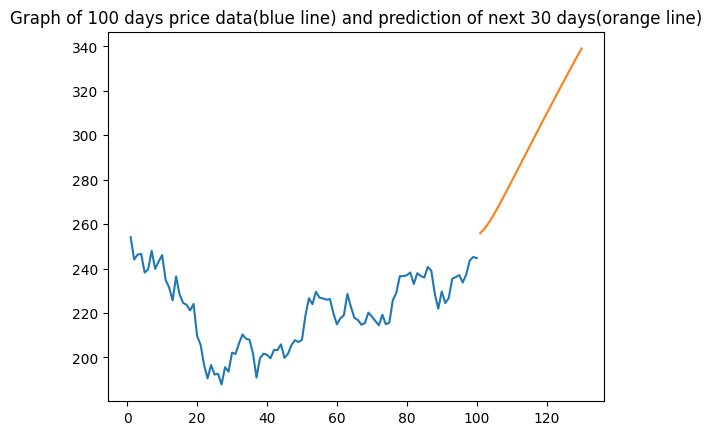

In [ ]:
plt.title("Graph of 100 days price data(blue line) and prediction of next 30 days(orange line)")
plt.plot(day_new,scaler.inverse_transform(share_close[321:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


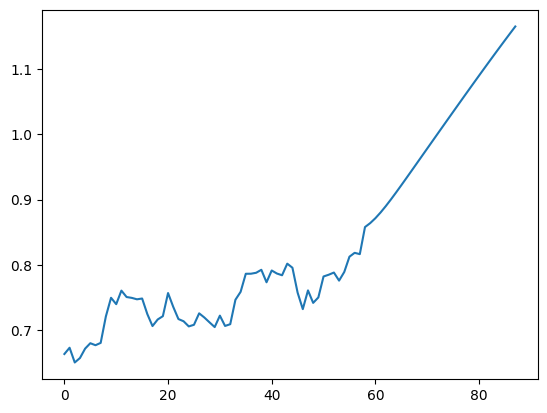

In [ ]:
df3=share_close.tolist()
df3.extend(lst_output)
plt.plot(df3[363:])

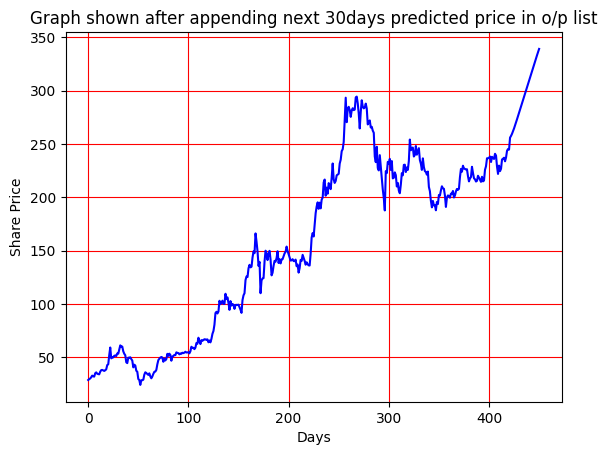

In [ ]:
plt.xlabel('Days')
plt.ylabel('Share Price')

plt.grid(True,color='red')
df3=scaler.inverse_transform(df3).tolist()
plt.title("Graph shown after appending next 30days predicted price in o/p list")
plt.plot(df3,color='blue')

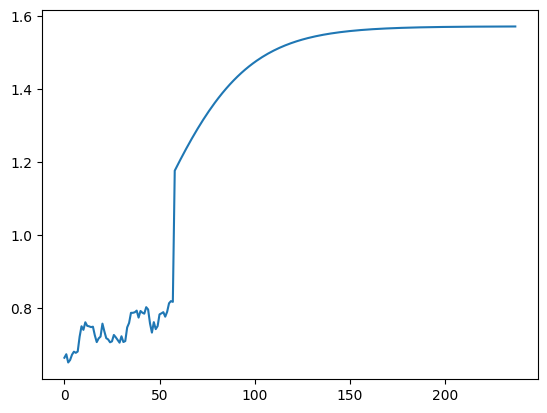

In [ ]:
df4=share_close.tolist()
df4.extend(lst_output1)
plt.plot(df4[363:])

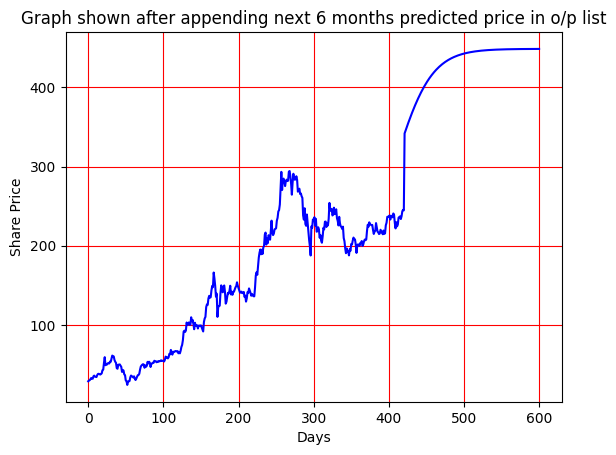

In [ ]:
plt.xlabel('Days')
plt.ylabel('Share Price')

plt.grid(True,color='red')
df4=scaler.inverse_transform(df4).tolist()
plt.title("Graph shown after appending next 6 months predicted price in o/p list")
plt.plot(df4,color='blue')

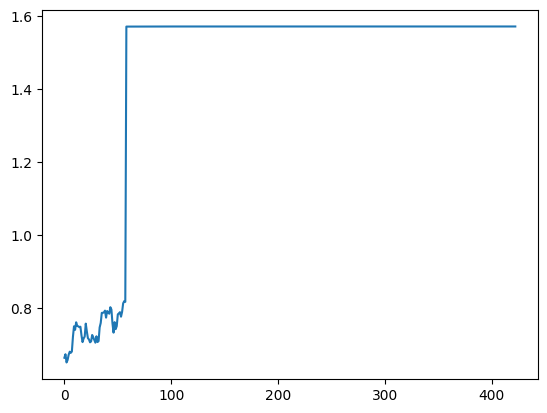

In [ ]:
df5=share_close.tolist()
df5.extend(lst_output2)
plt.plot(df5[363:])

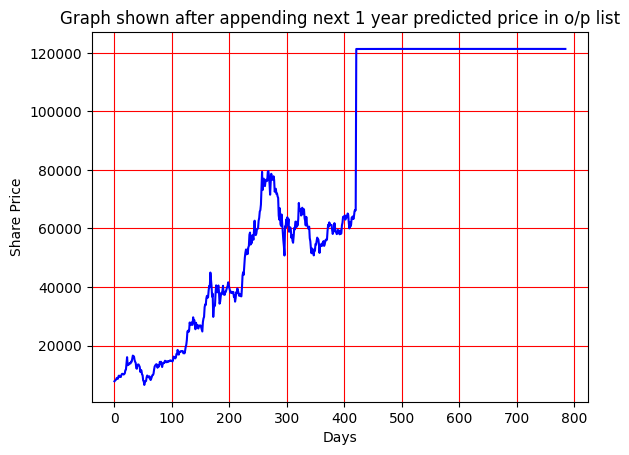

In [ ]:
plt.xlabel('Days')
plt.ylabel('Share Price')

plt.grid(True,color='red')
df5=scaler.inverse_transform(df5).tolist()
plt.title("Graph shown after appending next 1 year predicted price in o/p list")
plt.plot(df5,color='blue')

In [ ]:
print("Average of next 30 days predicted close price : ",np.mean(scaler.inverse_transform(lst_output)))

Average of next 30 days predicted close price :  296.21976285735843


In [ ]:
print("Average of next 6 months predicted close price : ",np.mean(scaler.inverse_transform(lst_output1)))

Average of next 6 months predicted close price :  430.8088375514587


In [ ]:
print("Average of next 1 year predicted close price : ",np.mean(scaler.inverse_transform(lst_output2)))

Average of next 1 year predicted close price :  448.7809540387298


In [ ]:
share_high=df.loc['2020-01-01':'2021-09-01']['High']
share_high

Date
2020-01-02     28.713333
2020-01-03     30.266666
2020-01-06     30.104000
2020-01-07     31.441999
2020-01-08     33.232666
                 ...    
2021-08-26    238.466660
2021-08-27    238.333328
2021-08-30    243.666672
2021-08-31    246.796661
2021-09-01    247.330002
Name: High, Length: 421, dtype: float64

<Axes: xlabel='Date'>

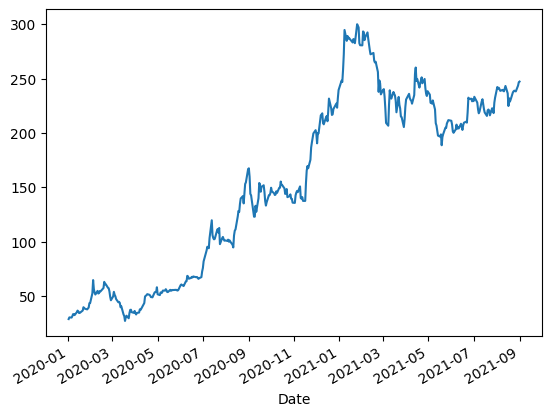

In [ ]:
share_high.plot()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler1=MinMaxScaler(feature_range=(0,1))
share_high=scaler1.fit_transform(np.array(share_high).reshape(-1,1))

In [ ]:
share_high

array([[0.00630684],
       [0.01199373],
       [0.01139819],
       [0.01629673],
       [0.02285252],
       [0.02292819],
       [0.01954534],
       [0.02947666],
       [0.03479256],
       [0.03245678],
       [0.02675036],
       [0.02704569],
       [0.03507812],
       [0.04628594],
       [0.04323503],
       [0.04124828],
       [0.03894912],
       [0.04196829],
       [0.0451388 ],
       [0.06004676],
       [0.06056419],
       [0.09306003],
       [0.13768873],
       [0.10766534],
       [0.0954251 ],
       [0.08905968],
       [0.1013219 ],
       [0.09241813],
       [0.09394114],
       [0.10083619],
       [0.09960851],
       [0.11108724],
       [0.13177973],
       [0.12377902],
       [0.12403774],
       [0.1119415 ],
       [0.1102574 ],
       [0.0996915 ],
       [0.08174239],
       [0.06972181],
       [0.08269915],
       [0.09814651],
       [0.08827133],
       [0.08320194],
       [0.07374411],
       [0.06300493],
       [0.06422529],
       [0.060

In [ ]:
training_size1=int(len(share_high)*0.65)
test_size1=len(share_high)-training_size1
train_data1,test_data1=share_high[0:training_size1,:],share_high[training_size1:len(share_high),:1]

In [ ]:
time_step=100
X_train1,y_train1=create_dataset(train_data1,time_step)
X_test1,y_test1=create_dataset(test_data1,time_step)

In [ ]:
X_train1=X_train1.reshape(X_train1.shape[0],X_train1.shape[1],1)
X_test1=X_test1.reshape(X_test1.shape[0],X_test1.shape[1],1)

In [ ]:
model1=Sequential()
model1.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model1.add(LSTM(50,return_sequences=True))
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model1.fit(X_train1,y_train1,validation_data=(X_test1,y_test1),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
3/3 [==============================] - 7s 707ms/step - loss: 0.1897 - val_loss: 0.1699
Epoch 2/100
3/3 [==============================] - 0s 38ms/step - loss: 0.0509 - val_loss: 0.0276
Epoch 3/100
3/3 [==============================] - 0s 38ms/step - loss: 0.0347 - val_loss: 0.0306
Epoch 4/100
3/3 [==============================] - 0s 37ms/step - loss: 0.0136 - val_loss: 0.0110
Epoch 5/100
3/3 [==============================] - 0s 32ms/step - loss: 0.0185 - val_loss: 0.0327
Epoch 6/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0204 - val_loss: 0.0106
Epoch 7/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0105 - val_loss: 0.0038
Epoch 8/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0093 - val_loss: 0.0168
Epoch 9/100
3/3 [==============================] - 0s 28ms/step - loss: 0.0103 - val_loss: 0.0052
Epoch 10/100
3/3 [==============================] - 0s 27ms/step - loss: 0.0064 - val_loss: 0.0013
Epoch 11/100
3/3 [

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_predict1=model1.predict(X_train1)
test_predict1=model.predict(X_test1)

2/2 [==============================] - 0s 10ms/step


In [ ]:
train_predict1=scaler1.inverse_transform(train_predict1)
test_predict1=scaler1.inverse_transform(test_predict1)


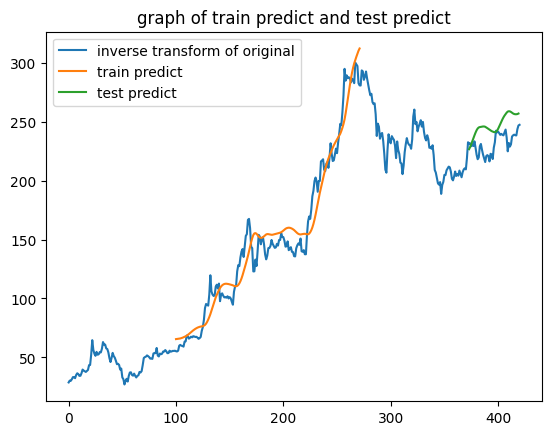

In [ ]:
look_back=100
trainPredictPlot1 = np.empty_like(share_high)
trainPredictPlot1[:, :] = np.nan
trainPredictPlot1[look_back:len(train_predict1)+look_back, :] = train_predict1
# shift test predictions for plotting
testPredictPlot1 = np.empty_like(share_high)
testPredictPlot1[:, :] = np.nan
testPredictPlot1[len(train_predict1)+(look_back*2)+1:len(share_high)-1, :] = test_predict1
# plot baseline and predictions
plt.plot(scaler1.inverse_transform(share_high))
plt.plot(trainPredictPlot1)
plt.plot(testPredictPlot1)
plt.title('graph of train predict and test predict')
plt.legend(["inverse transform of original","train predict","test predict"])
plt.show()

In [ ]:
x_input1=test_data1[48:].reshape(1,-1)
x_input1.shape

(1, 100)

In [ ]:
temp_input1=list(x_input1)
temp_input1=temp_input1[0].tolist()


In [ ]:
temp_input1

[0.8323220459650057,
 0.8540323414153435,
 0.8087568486670627,
 0.8157373106706624,
 0.7864364087166783,
 0.8008977048431707,
 0.8101602592264995,
 0.8210581148321193,
 0.80103194557139,
 0.815603069942443,
 0.7847278700434113,
 0.7658122732658283,
 0.7581849642409836,
 0.7743182082471585,
 0.7627613273103676,
 0.7352421456168199,
 0.7374998255128903,
 0.7322766712860681,
 0.7432355301689312,
 0.7127874649382162,
 0.6664746930215721,
 0.6583104210838499,
 0.6412863728112639,
 0.6247016375169205,
 0.6208696596758023,
 0.6288264534343291,
 0.592166723911939,
 0.6197957897138544,
 0.6293511821734736,
 0.6510736559337372,
 0.6504756897436166,
 0.6653397080547669,
 0.671392719134564,
 0.6768355298505075,
 0.6746510874054131,
 0.6619105082621138,
 0.6389554554642173,
 0.634147257595786,
 0.6456064327341351,
 0.6615810235284318,
 0.6477908751792294,
 0.6536486422535638,
 0.6487305602767649,
 0.6645099070655991,
 0.6538927112263438,
 0.6437758875063815,
 0.659604003398726,
 0.6680001101354954,

In [ ]:
print(" Highest price for next 30 days\n")
from numpy import array

lst_output6=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input1)>100):
        #print(temp_input)
        x_input1=np.array(temp_input1[1:])
        print("\n{} day input \t{}".format(i,x_input1))
        x_input1=x_input1.reshape(1,-1)
        x_input1 = x_input1.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model1.predict(x_input1, verbose=0)
        print("\n{} day output {}".format(i,yhat))
        temp_input1.extend(yhat[0].tolist())
        temp_input1=temp_input1[1:]
        #print(temp_input)
        lst_output6.extend(yhat.tolist())
        i=i+1
    else:
        x_input1 = x_input1.reshape((1, n_steps,1))
        yhat = model1.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input1.extend(yhat[0].tolist())
        print(len(temp_input1))
        lst_output6.extend(yhat.tolist())
        i=i+1


print(lst_output6)

 Highest price for next 30 days

[1.6018459]
101

1 day input 	[0.85403234 0.80875685 0.81573731 0.78643641 0.8008977  0.81016026
 0.82105811 0.80103195 0.81560307 0.78472787 0.76581227 0.75818496
 0.77431821 0.76276133 0.73524215 0.73749983 0.73227667 0.74323553
 0.71278746 0.66647469 0.65831042 0.64128637 0.62470164 0.62086966
 0.62882645 0.59216672 0.61979579 0.62935118 0.65107366 0.65047569
 0.66533971 0.67139272 0.67683553 0.67465109 0.66191051 0.63895546
 0.63414726 0.64560643 0.66158102 0.64779088 0.65364864 0.64873056
 0.66450991 0.65389271 0.64377589 0.659604   0.66800011 0.67171003
 0.66826859 0.7032076  0.75253468 0.74788513 0.74897123 0.74019682
 0.74666473 0.74078261 0.75543915 0.73591335 0.71358068 0.69982717
 0.70529445 0.73986733 0.74723834 0.72933561 0.71411764 0.7025974
 0.69100399 0.70954127 0.71255557 0.70927279 0.69295654 0.71663162
 0.71455701 0.7004862  0.73553504 0.75242485 0.78831578 0.78308039
 0.78582621 0.78100578 0.77536772 0.77866268 0.77568497 0.77396426


In [ ]:
day_new1=np.arange(1,101)
day_pred1=np.arange(101,131)
import matplotlib.pyplot as plt

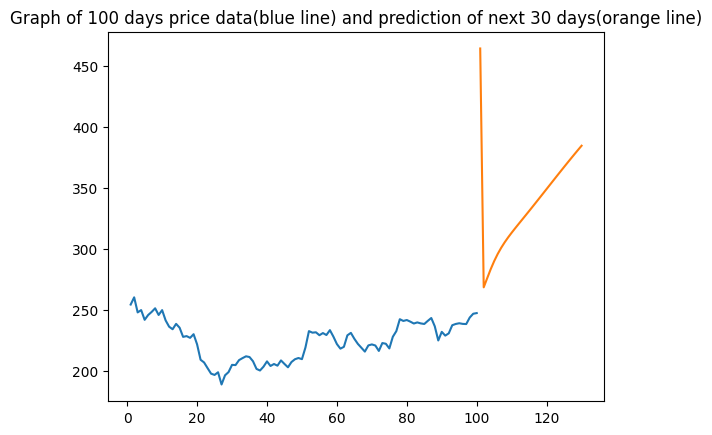

In [ ]:
plt.title("Graph of 100 days price data(blue line) and prediction of next 30 days(orange line)")
plt.plot(day_new1,scaler1.inverse_transform(share_high[321:]))
plt.plot(day_pred1,scaler1.inverse_transform(lst_output6))


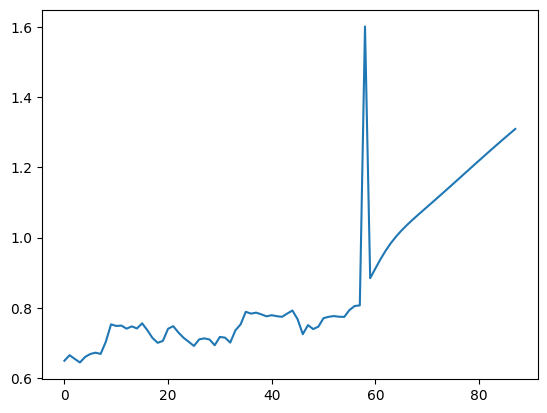

In [ ]:
df6=share_high.tolist()
df6.extend(lst_output6)
plt.plot(df6[363:])

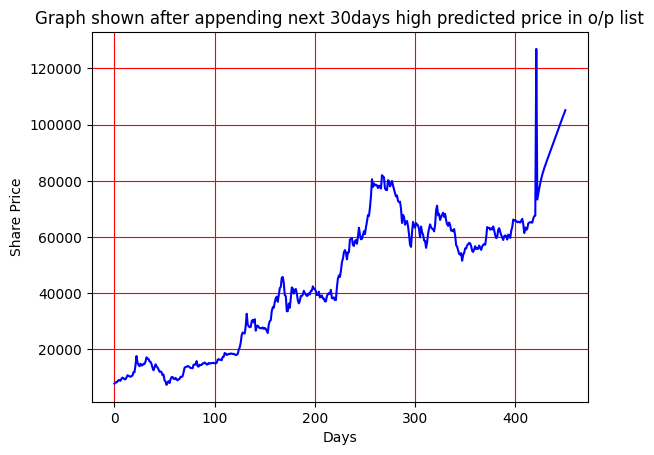

In [ ]:
plt.xlabel('Days')
plt.ylabel('Share Price')

plt.grid(True,color='red')
df6=scaler1.inverse_transform(df6).tolist()
plt.title("Graph shown after appending next 30days high predicted price in o/p list")
plt.plot(df6,color='blue')

In [ ]:
print("Average of next 30 days predicted high price : ",np.mean(scaler1.inverse_transform(lst_output6)))

Average of next 30 days predicted high price :  337.56084176215757


In [ ]:
print(" Highest price for next 6 months\n")
from numpy import array

lst_output7=[]
n_steps=100
i=0
while(i<180):

    if(len(temp_input1)>100):
        #print(temp_input)
        x_input1=np.array(temp_input1[1:])
        print("\n{} day input \t{}".format(i,x_input1))
        x_input1=x_input1.reshape(1,-1)
        x_input1 = x_input1.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model1.predict(x_input1, verbose=0)
        print("\n{} day output {}".format(i,yhat))
        temp_input1.extend(yhat[0].tolist())
        temp_input1=temp_input1[1:]
        #print(temp_input)
        lst_output7.extend(yhat.tolist())
        i=i+1
    else:
        x_input1 = x_input1.reshape((1, n_steps,1))
        yhat = model1.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input1.extend(yhat[0].tolist())
        print(len(temp_input1))
        lst_output7.extend(yhat.tolist())
        i=i+1


print(lst_output7)

 Highest price for next 6 months


0 day input 	[0.65047569 0.66533971 0.67139272 0.67683553 0.67465109 0.66191051
 0.63895546 0.63414726 0.64560643 0.66158102 0.64779088 0.65364864
 0.64873056 0.66450991 0.65389271 0.64377589 0.659604   0.66800011
 0.67171003 0.66826859 0.7032076  0.75253468 0.74788513 0.74897123
 0.74019682 0.74666473 0.74078261 0.75543915 0.73591335 0.71358068
 0.69982717 0.70529445 0.73986733 0.74723834 0.72933561 0.71411764
 0.7025974  0.69100399 0.70954127 0.71255557 0.70927279 0.69295654
 0.71663162 0.71455701 0.7004862  0.73553504 0.75242485 0.78831578
 0.78308039 0.78582621 0.78100578 0.77536772 0.77866268 0.77568497
 0.77396426 0.78326346 0.79192804 0.76703262 0.72441753 0.75027705
 0.7390253  0.74583493 0.77024216 0.77401308 0.77614875 0.77423274
 0.7737446  0.79327045 0.80472963 0.80668223 1.60184586 0.88407731
 0.91163588 0.93857616 0.96295321 0.98430836 1.00292957 1.01939607
 1.03432548 1.04825425 1.06159627 1.07464325 1.08758438 1.10053062
 1.11353838 1.

In [ ]:
print(" Highest price for next 1 year\n")
from numpy import array

lst_output8=[]
n_steps=100
i=0
while(i<365):

    if(len(temp_input1)>100):
        #print(temp_input)
        x_input1=np.array(temp_input1[1:])
        print("\n{} day input \t{}".format(i,x_input1))
        x_input1=x_input1.reshape(1,-1)
        x_input1 = x_input1.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model1.predict(x_input1, verbose=0)
        print("\n{} day output {}".format(i,yhat))
        temp_input1.extend(yhat[0].tolist())
        temp_input1=temp_input1[1:]
        #print(temp_input)
        lst_output8.extend(yhat.tolist())
        i=i+1
    else:
        x_input1 = x_input1.reshape((1, n_steps,1))
        yhat = model1.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input1.extend(yhat[0].tolist())
        print(len(temp_input1))
        lst_output8.extend(yhat.tolist())
        i=i+1


print(lst_output8)

Streaming output truncated to the last 5000 lines.
115 day input 	[1.655931   1.65593135 1.65593159 1.65593195 1.65593219 1.65593255
 1.65593278 1.65593302 1.65593326 1.6559335  1.65593374 1.65593386
 1.65593398 1.65593421 1.65593445 1.65593445 1.65593469 1.65593481
 1.65593493 1.65593505 1.65593517 1.65593529 1.65593529 1.65593529
 1.65593553 1.65593565 1.65593565 1.65593576 1.65593588 1.65593588
 1.655936   1.65593612 1.65593612 1.65593612 1.65593612 1.65593624
 1.65593636 1.65593636 1.65593636 1.65593636 1.6559366  1.6559366
 1.6559366  1.6559366  1.6559366  1.6559366  1.65593672 1.65593672
 1.6559366  1.6559366  1.65593672 1.65593672 1.6559366  1.65593672
 1.65593684 1.65593684 1.65593684 1.65593684 1.65593684 1.65593672
 1.65593684 1.65593684 1.65593684 1.65593684 1.65593684 1.65593684
 1.65593684 1.65593672 1.65593684 1.65593684 1.65593684 1.65593684
 1.65593684 1.65593684 1.65593684 1.65593684 1.65593684 1.65593684
 1.65593684 1.65593684 1.65593684 1.65593684 1.65593684 1.655936

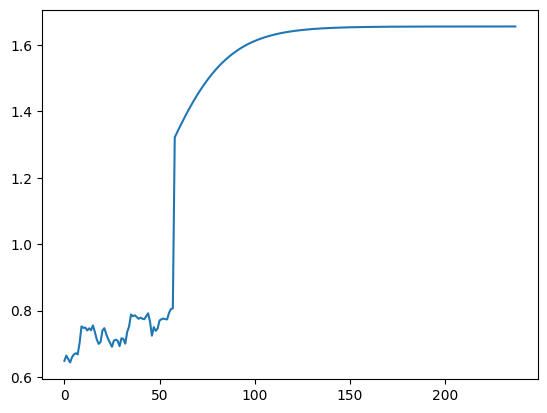

In [ ]:
df7=share_high.tolist()
df7.extend(lst_output7)
plt.plot(df7[363:])

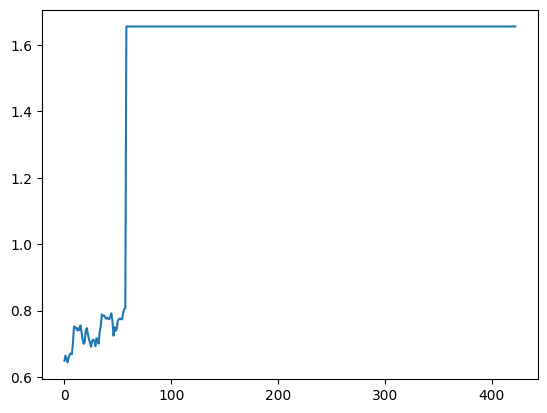

In [ ]:
df8=share_high.tolist()
df8.extend(lst_output8)
plt.plot(df8[363:])

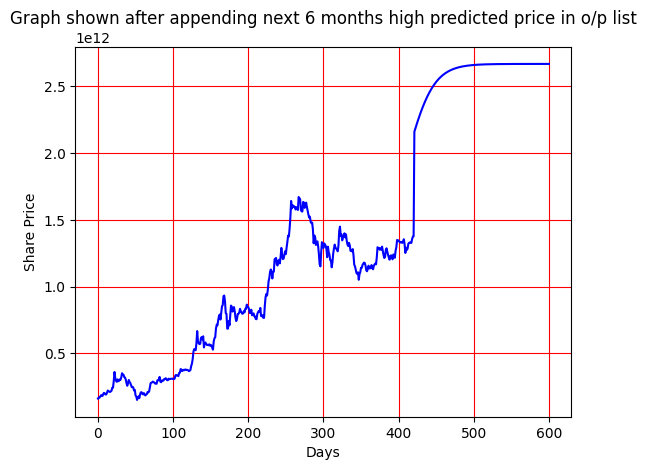

In [ ]:
plt.xlabel('Days')
plt.ylabel('Share Price')

plt.grid(True,color='red')
df7=scaler1.inverse_transform(df7).tolist()
plt.title("Graph shown after appending next 6 months high predicted price in o/p list")
plt.plot(df7,color='blue')

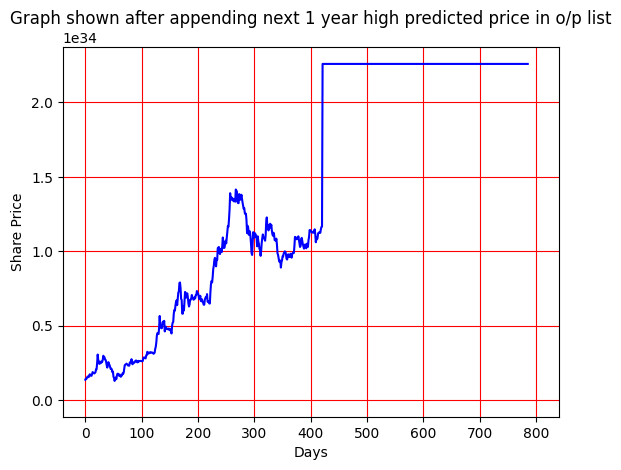

In [ ]:
plt.xlabel('Days')
plt.ylabel('Share Price')

plt.grid(True,color='red')
df8=scaler1.inverse_transform(df8).tolist()
plt.title("Graph shown after appending next 1 year high predicted price in o/p list")
plt.vlines(x=[70, 100, 200, 300, 400, 500, 600, 700, 800], ymin=0, ymax=1.0, colors='grey', linestyles='dashed')
plt.plot(df8,color='blue')

In [ ]:
print("Average of next  6 months predicted high price : ",np.mean(scaler1.inverse_transform(lst_output7)))

Average of next  6 months predicted high price :  468.1514311051415


In [ ]:
print("Average of next 1 year predicted high price : ",np.mean(scaler1.inverse_transform(lst_output8)))

Average of next 1 year predicted high price :  479.2974884261294
